In [16]:
mode="Tree"
print mode.lower() in ["tree", "t"]
print "Tree", type("Tree")
print mode.lower()[0]

True
Tree <type 'str'>
t


In [ ]:
from modules.darkSUSY.classDarkSUSY import *
from modules.general.F_search import *
from modules.graph.histograms import *

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from IPython.display import clear_output

Delphes_DIR = "/home/franky8939/PROGRAMAS/MG5_aMC_v2_6_7/Delphes/"  # Directory local of Delphes
ROOT_DIR = "/home/franky8939/PROGRAMAS/root-6.18.02/"  # Directory local of Root
fbash(Delphes_DIR, ROOT_DIR)  # path in bash of Delphes and Root

# CLASE DARKSUSY
DarkFile = DarkSUSY()  # inicializar la clase

In [122]:
# BUSCAR DATA
Event = 10000
Vect_MNeuL = [1,3,4]
Vect_MNeuD = [0.25, 1]
Vect_MPhoD = [0.25, 1, 2, 3, 4, 5,] # masa de los photons
Vect_TcPhoD = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # valores de Tc
Vect_Card = ["HL", "CMS"]

Mat_MNeuL, Mat_MNeuD, \
Mat_MPhoD, Mat_TcPhoD = np.meshgrid(Vect_MNeuL, 
                                    Vect_MNeuD, 
                                    Vect_MPhoD, 
                                    Vect_TcPhoD,
                                    sparse=False, indexing='ij')  # MATRIX COMBINADA
print  Mat_MNeuL[:, 1, 0, 0]
print  Mat_MNeuD[0, :, 0, 0]
print  Mat_MPhoD[0, 0, :, 0]
print  Mat_TcPhoD[2, 1, :, 5]
for x, y, z, k in range(Mat_TcPhoD.shape):
    print x, y, z, k

[1 3 4]
[0.25 1.  ]
[0.25 1.   2.   3.   4.   5.  ]
[50 50 50 50 50 50]


TypeError: range() integer end argument expected, got tuple.

In [ ]:
# BUSCANDO ARCHIVO DEFAULT
directory = "data/ALL/"
particle = "Muon"
EntriesCMS=np.zeros((len(Vect_MPhoD), len(Vect_TcPhoD)))
EntriesHL=np.zeros((len(Vect_MPhoD), len(Vect_TcPhoD)))
ErrorEntriesCMS = np.zeros(EntriesCMS.shape)
ErrorEntriesHL = np.zeros(EntriesHL.shape)






In [ ]:
# BUSCAR DATA
Event = 10000
Vect_MNeuL = [10]
Vect_MNeuD = [0.25]
Vect_MPhoD = [0.25, 1, 2, 3, 4, 5,]  # masa de los photons
Vect_TcPhoD = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # valores de Tc
Vect_Card = ["HL", "CMS"]
# BUSCANDO ARCHIVO DEFAULT
directory = "data/ALL/"
particle = "Muon"
EntriesCMS=np.zeros((len(Vect_MPhoD), len(Vect_TcPhoD)))
EntriesHL=np.zeros((len(Vect_MPhoD), len(Vect_TcPhoD)))
ErrorEntriesCMS = np.zeros(EntriesCMS.shape)
ErrorEntriesHL = np.zeros(EntriesHL.shape)
i = 0
j = 0
for MNeuL in Vect_MNeuL:
    for MNeuD in Vect_MNeuD:
        for MPhoD in Vect_MPhoD:
            if MPhoD is not Vect_MPhoD[0]:
                i += 1
                j = 0
            for TcPhoD in Vect_TcPhoD:
                clear_output()
                if TcPhoD is not Vect_TcPhoD[0]:
                    j +=1
                fileROOT_HL = FindROOT(Event=Event,
                                Card=None, 
                                MNeuL=MNeuL, 
                                MNeuD=MNeuD, 
                                MPhoD=MPhoD, 
                                TcPhoD=TcPhoD, 
                                include=["Mu4_DarkSUSY", "_.root", "_HL_"], 
                                directory="data/ALL/")
                fileROOT_CMS = FindROOT(Event=Event,
                                Card=None, 
                                MNeuL=MNeuL, 
                                MNeuD=MNeuD, 
                                MPhoD=MPhoD, 
                                TcPhoD=TcPhoD, 
                                include=["Mu4_DarkSUSY", "_.root", "_CMS_"], 
                                directory="data/ALL/")
                if fileROOT_HL is not None:
                    DarkFileHL = DarkFile  # new
                    DarkFileHL.Add_File("data/ALL/" + fileROOT_HL[0])
                    EntriesHL[i,j] = DarkFileHL.Entries
                if fileROOT_CMS is not None:
                    DarkFileCMS = DarkFile  # new
                    DarkFileCMS.Add_File("data/ALL/" + fileROOT_CMS[0])
                    EntriesCMS[i,j] = DarkFileCMS.Entries
                clear_output()

In [36]:
print EntriesCMS
print EntriesHL

[[500. 227.  72.  41.  25.  16.  15.   8.   5.   9.   2.]
 [485. 417. 243. 167. 111.  72.  77.  35.  42.  46.  28.]
 [488. 465. 420. 298. 232. 182. 179. 130. 127.  90.  75.]
 [476. 480. 438. 376. 318. 284. 232. 199. 178. 163. 143.]
 [525. 512. 459. 436. 407. 371. 311. 272. 244. 213. 183.]
 [496. 494. 484. 450. 450. 397. 393. 311. 301. 281. 254.]]
[[ 902.  433.  179.   77.   47.   39.   44.   17.   16.   11.    6.]
 [1053.  902.  592.  411.  348.  212.  162.  139.  106.   91.   76.]
 [1102. 1028.  898.  706.  587.  507.  388.  326.  300.  238.  215.]
 [1111. 1098.  963.  876.  774.  652.  548.  493.  373.  380.  338.]
 [1154. 1149. 1063.  934.  885.  782.  705.  625.  584.  512.  502.]
 [1267. 1223. 1220. 1134.  973.  956.  818.  809.  758.  688.  590.]]


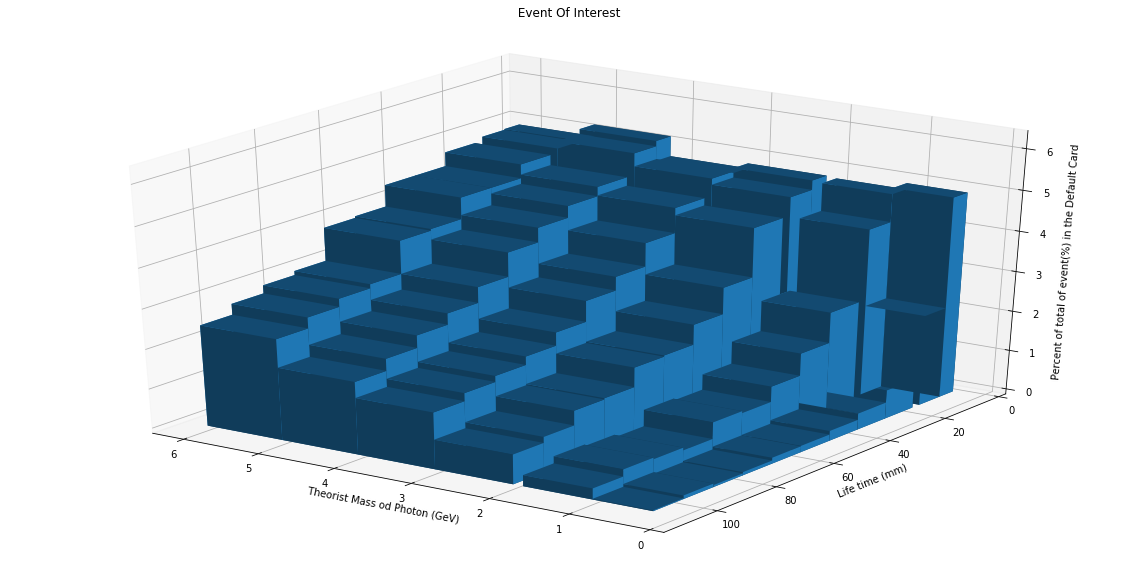

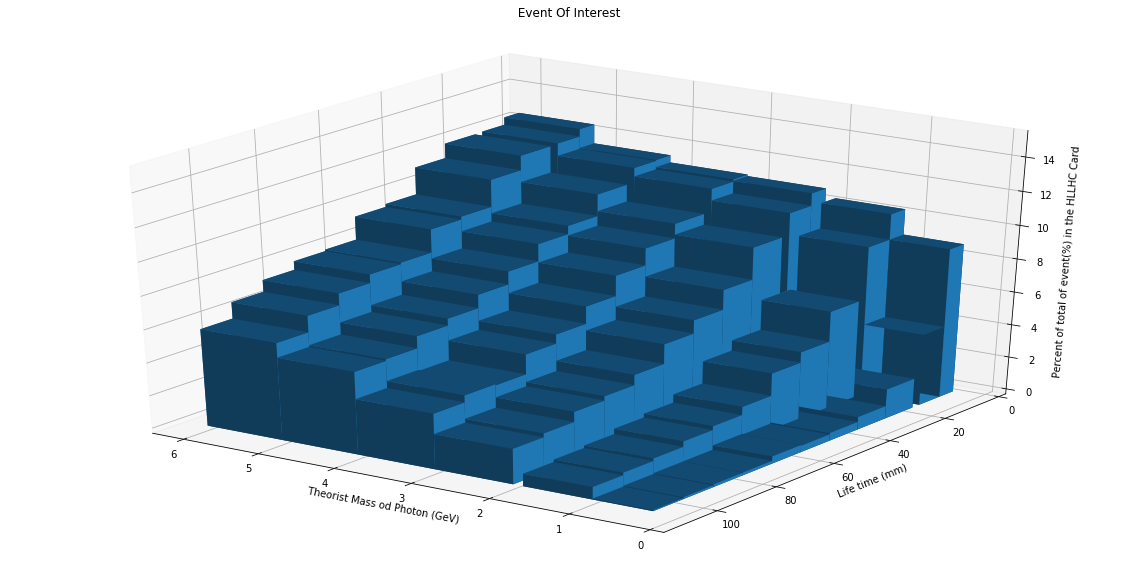

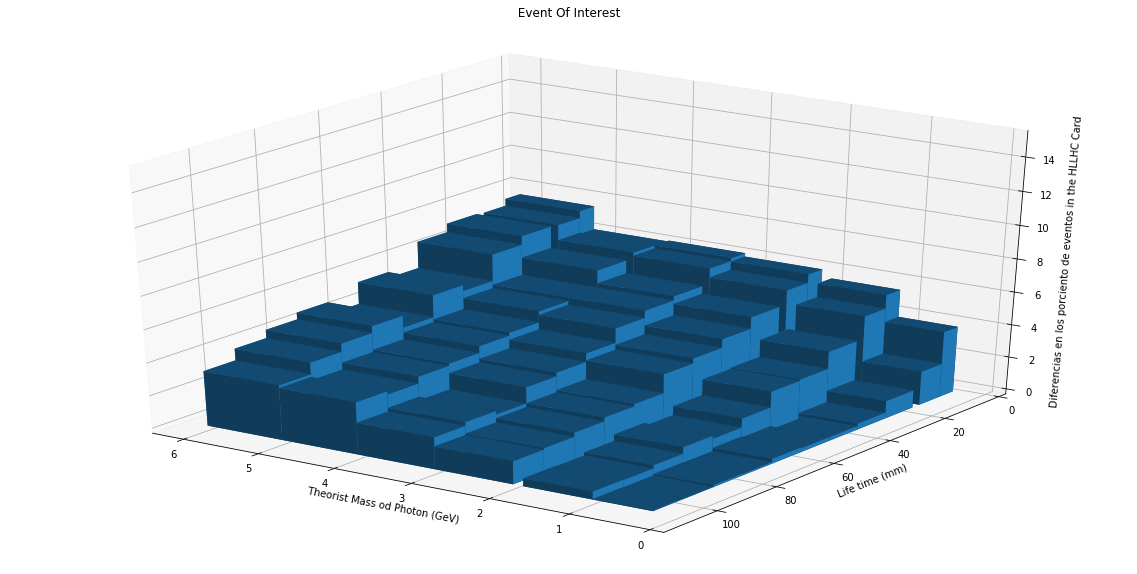

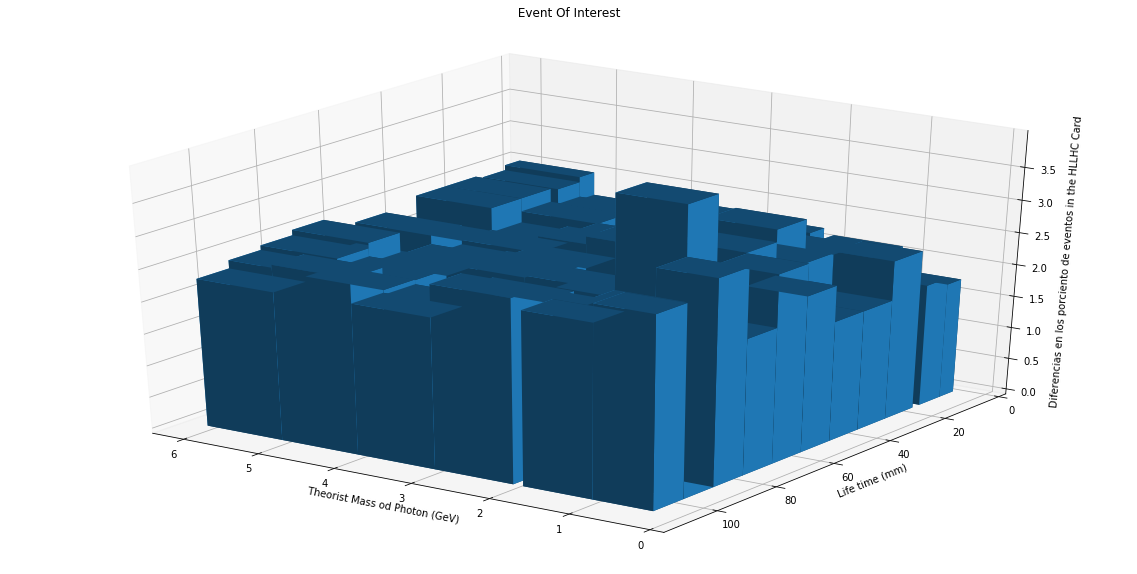

In [50]:
X0, Y0 = np.meshgrid(Vect_MPhoD, Vect_TcPhoD, sparse=False, indexing='ij')  # MATRIX COMBINADA

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X0.ravel(),Y0.ravel(), 0, 
         abs(np.gradient(X0, axis=0)).ravel(),  
         abs(np.gradient(Y0, axis=1)).ravel(),
         EntriesCMS.ravel()/100, zsort='average')
ax.set_zlim(0, np.max(EntriesCMS)*1.2/100)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%) in the Default Card")
ax.view_init(30, 125)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X0.ravel(),Y0.ravel(), 0, 
         abs(np.gradient(X0, axis=0)).ravel(),  
         abs(np.gradient(Y0, axis=1)).ravel(),
         EntriesHL.ravel()/100, zsort='average')
ax.set_zlim(0, np.max(EntriesHL)*1.2/100)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Percent of total of event(%) in the HLLHC Card")
ax.view_init(30, 125)

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X0.ravel(),Y0.ravel(), 0, 
         abs(np.gradient(X0, axis=0)).ravel(),  
         abs(np.gradient(Y0, axis=1)).ravel(),
         EntriesHL.ravel()/100 - EntriesCMS.ravel()/100, zsort='average')
ax.set_zlim(0, np.max(EntriesHL)*1.2/100)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Diferencias en los porciento de eventos in the HLLHC Card")
ax.view_init(30, 125)


plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X0.ravel(),Y0.ravel(), 0, 
         abs(np.gradient(X0, axis=0)).ravel(),  
         abs(np.gradient(Y0, axis=1)).ravel(),
         (EntriesHL.ravel())/(EntriesCMS.ravel()), zsort='average')
#ax.set_zlim(0, np.max(EntriesHL)*1.2/100)
ax.set_title(' Event Of Interest ', y=1.08)
ax.set_xlabel('  Theorist Mass od Photon (GeV)')
ax.set_ylabel(" Life time (mm)")
ax.set_zlabel(" Diferencias en los porciento de eventos in the HLLHC Card")
ax.view_init(30, 125)

In [40]:
print X0.ravel()
print abs(np.gradient(X0, axis=0)).ravel()
print Y0.T.ravel()
print abs(np.gradient(Y0, axis=1)).ravel()
print np.max(EntriesCMS)*1.2

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.   2.   2.   2.
 2.   2.   2.   2.   2.   3.   3.   3.   3.   3.   3.   3.   3.   3.
 3.   3.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.   5.
 5.   5.   5.   5.   5.   5.   5.   5.   5.   5.  ]
[0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.875
 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.   ]
[  5   5   5   5   5   5  10  10  10  10  10  10  20  20  20  20  20  20
  30  30  30  30  30  30  40  40  40  40  40  40  50  50  50  50  50  50
  60  60  60  60  60  60  70  70  70  70  70  70  80  80  80  80  80  80
  90  90  90  90  90  90 100 100 100 100 100 100]
[ 5.   7.5 1

In [51]:
a = None
str(a)



'None'